# Predicción de Deserción Estudiantil con Redes Neuronales

Este notebook permite predecir la deserción estudiantil en Instituciones de Educación Superior (IES).
Se basa en 4 variables, pero puede ser expandido para usar las que la institución considere necesarias, siempre y cuando haga una estandarización de los grupos de datos(1 o 0 por columnas).
Las dimensiones del dataset de ejemplo son:

- Económica: 6 niveles. Basado en la agregación de las variables ingreso_familiar, estudiante_trabaja, estrato, nivel sisven, apoyo_icetex, y estandarizado mediante divisiones para llegar a los 6 niveles.
- Personal: 5 niveles. Basado en la agregación de las variables: padre_lee, madre_lee, familia_personas, familia_hermanos, nivel_educacion_madre, nivel_educacion_padre, estudiante_genero
- Institucional: 5 niveles. Basado en la agregación de las columnas: programa_metodologia, programa_area, programa_nivel
- Académica: 6 niveles. Basado en la sumatoria de los puntajes SABER del estudiante, debe adicionarse o reemplazarse con las calificaciones del estudiante.

El dataset original está basado en la base SPADIES de 2016 pero es solamente para propósito de pruebas, y se espera que las IES determinen los valores para estas dimensiones o establezcan nuevas. Los valores fueron filtrados para tener un dataset de información relevante.

Para cargar los dataset se usan dos librerías, Pandas y numpy, sobre los cuales se puede encontrar documentación en estos sitios de referencia:
- https://pandas.pydata.org/pandas-docs/stable/
- https://numpy.org/doc/
Para las redes neuronales se usaron un algoritmo Adaline sencillo monocapa, escrito en código, y la librería scikit de la cual se pueden encontrar ejemplos de uso en esta página:
- https://scikit-learn.org/stable/user_guide.html

Se pueden usar las implementaciones de ejemplo de cada algoritmo y con la configuración de los hiperparámetros se puede determinar el algoritmo más conveniente y preciso.
Los algoritmos implementados aquí son: Adaline, Perceptrón multicapa, Perceptrón regresor multicapa y Random Forest


## Importante
Las librerías pandas, numpy y scikit deben ser instaladas en el ambiente del notebook para que funcione. 
Se sugiere usar pip para hacer la instalación mediante el comando: 'pip install "librería"', por ejemplo: pip install pandas

In [1]:
# Importando pandas y numpy
import pandas as pd
import numpy as np

# leyendo el dataset
data = pd.read_csv('Datos_estudiantes.csv')

# Valida la carga de datos
data.head()


,academica,personal,economica,institucional,deserta
1,2,1,2,2,0
2,2,1,2,2,0
3,3,1,4,2,0
4,2,2,2,2,1
5,3,1,2,2,0


### Opcional
## Dibujando los datos

Vamos a dibujar la data para ver cómo luce, vamos a tomar dos dimensiones originalmente

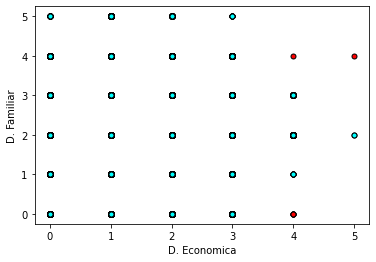

In [3]:
import matplotlib.pyplot as plt

def plot_points(data):
    X = np.array(data[["economica","academica"]])
    y = np.array(data["deserta"])
    desertor = X[np.argwhere(y==1)]
    continua = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in continua], [s[0][1] for s in continua], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in desertor], [s[0][1] for s in desertor], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('D. Economica')
    plt.ylabel('D. Familiar')
    
plot_points(data)
plt.show()

Normalmente no son fácilmente separables los grupos de desertores de los que continuan.

## Codificar los datos en binario

Una vez que tenemos un rango de valores, por ejemplo Institucional, con valores 0 a 4
Use la función `get_dummies` de pandas para codificar en valores 0 o 1 en columnas correspondientes a los posibles valores de la dimensión. 

Finalmente, elimine la columna codificada usando la función `drop`. 
Para más información:(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html).

In [6]:
# one_hot_data va a tener la data codificada
one_hot_data = data[:]

# crear columnas codificadas para academica y eliminar la columna original
one_hot_data = pd.concat( [one_hot_data, pd.get_dummies(one_hot_data['academica'], prefix = 'academica')], axis=1)
one_hot_data.drop(["academica"], axis=1, inplace=True)

# crear columnas codificadas para personal y eliminar la columna original
one_hot_data = pd.concat( [one_hot_data, pd.get_dummies(one_hot_data['personal'], prefix = 'personal')], axis=1)
one_hot_data.drop(["personal"], axis=1, inplace=True)

# crear columnas codificadas para institucional y eliminar la columna original
one_hot_data = pd.concat( [one_hot_data, pd.get_dummies(one_hot_data['institucional'], prefix = 'institucional')], axis=1)
one_hot_data.drop(["institucional"], axis=1, inplace=True)


# crear columnas codificadas para personal y eliminar la columna original
one_hot_data = pd.concat( [one_hot_data, pd.get_dummies(one_hot_data['economica'], prefix = 'economica')], axis=1)
one_hot_data.drop(["economica"], axis=1, inplace=True)

# verificar la data
one_hot_data.head(10)

,deserta,academica_0,academica_1,academica_2,academica_3,academica_4,academica_5,personal_0,personal_1,personal_2,...,institucional_1,institucional_2,institucional_3,institucional_4,economica_0,economica_1,economica_2,economica_3,economica_4,economica_5
1,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
6,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
9,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
10,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


## Escalar los datos

El siguiente paso es escalar los datos. En este dataset ya se ha hecho este proceso dividiendo los valores hasta obtener unos rangos, pero si tiene data con valores continuos, debe buscar dejarlos como escalares. 
Por ejemplo: academica tenía valoes que oscilaban entre 1300 y 11500, al dividir entre 2000 y convertirlo a entero se logró el escalamiento:
`processed_data["academica"] = np.round(processed_data["academica"]/2000).astype(int)`

In [30]:
# Se copia en este caso, un porcentaje aleatorio del dataset original por ser un dataset grande (>200.000 registros)
sample = np.random.choice(one_hot_data.index, size=int(len(processed_data)*0.2), replace=False)
processed_data = one_hot_data.iloc[sample]


#processed_data["academica"] = np.round(processed_data["academica"]/2000).astype(int)

# validando los resultados
processed_data.head(15)

,deserta,academica_0,academica_1,academica_2,academica_3,academica_4,academica_5,personal_0,personal_1,personal_2,...,institucional_1,institucional_2,institucional_3,institucional_4,economica_0,economica_1,economica_2,economica_3,economica_4,economica_5
161025,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
14636,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
102195,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
151856,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3244,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
43601,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
170362,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
175388,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
114716,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
147941,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


## Dividiendo la data en entrenamiento y pruebas

Para entrenar el modelo y poder probarlo. se divide el dataset entre dos grupos: entrenamiento y pruebas. 
La librería scklearn nos permite hacer una división del dataset en los cuatro vectores necesarios: características de entrenamiento, resultado de entrenamiento, caracteristicas de pruebas y resultado de pruebas

In [61]:
from sklearn.model_selection import train_test_split
targets_total = processed_data['deserta']
features_total = processed_data.drop('deserta', axis=1)
features, features_test, targets, targets_test = train_test_split( features_total, targets_total, test_size=0.20, random_state=42)

print("El número de registros para entrenamiento es:", len(features))
print(features[:2])
print("El número de objetivos para entrenamiento es:", len(targets))
print(targets[:2])

print("El número de registros para prueba es:", len(features_test))
print(features_test[:2])
print("El número de registros para prueba es:", len(targets_test))
print(targets_test[:2])

El número de registros para entrenamiento es: 32778
        academica_0  academica_1  academica_2  academica_3  academica_4  \
148236            0            0            0            1            0   
149863            0            0            0            1            0   

        academica_5  personal_0  personal_1  personal_2  personal_3  ...  \
148236            0           0           1           0           0  ...   
149863            0           0           1           0           0  ...   

        institucional_1  institucional_2  institucional_3  institucional_4  \
148236                0                0                1                0   
149863                0                0                1                0   

        economica_0  economica_1  economica_2  economica_3  economica_4  \
148236            0            0            1            0            0   
149863            1            0            0            0            0   

        economica_5  
148236    

## Entrenar una red neuronal de una capa
Para evaluar usando una red neuronal de una capa se generarán unas funciones auxiliares

In [17]:
# Funcion sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

## Propagación del error

Creación de una función para determinar la propagación de los errores

In [18]:
def error_term_formula(x, y, output):
     return (y - output)*x

## Entrenamiento del modelo
En este caso el Adaline nos generará unos pesos como resultado del entrenamiento, que son lo que se irán ajustando para dar el resultado esperado en una regresión linear.

In [32]:
# Hyperparametros del modelo, se pueden ajustar para encontrar los que generan mayor tasa de exito
# Iteraciones en la red
epochs = 500
# Indice de aprendizaje, es un valor entre 0 y 1
learnrate = 0.00001

# Funcion de entrenamiento
def train_nn(features, targets, epochs, learnrate):
    
    # generación de semilla aleatoria
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Se inicializan los pesos
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Recorre los registros, x es la entrada, y el objetivo

            # Activación de la unidad de salida 
            output = sigmoid(np.dot(x, weights))

            # Determinar el término de error
            error_term = error_term_formula(x, y, output)

            # El paso descendiente del gradiente, la sumatoria del error
            del_w += error_term

        # Se actualizan los pesos
        weights += learnrate * del_w

        # Se imprime la media del cuadrado del error en el set de entrenamiento
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean(error_formula(targets, out))
            print("Ciclo:", e)
            if last_loss and last_loss < loss:
                print("Pérdida de entrenamiento: ", loss, " ALERTA - Pérdida de entrenamiento incrementado /!\\")
            else:
                print("Pérdida de entrenamiento: ", loss)
            last_loss = loss
            print("=========")
    print("Entrenamiento finalizado!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Ciclo: 0
Pérdida de entrenamiento:  0.6676256299347455
Ciclo: 50
Pérdida de entrenamiento:  0.6484325334620592
Ciclo: 100
Pérdida de entrenamiento:  0.647301597925497
Ciclo: 150
Pérdida de entrenamiento:  0.6467065512699041
Ciclo: 200
Pérdida de entrenamiento:  0.6463553889383059
Ciclo: 250
Pérdida de entrenamiento:  0.6461304173180263
Ciclo: 300
Pérdida de entrenamiento:  0.6459763340782728
Ciclo: 350
Pérdida de entrenamiento:  0.6458649357369747
Ciclo: 400
Pérdida de entrenamiento:  0.6457808613911057
Ciclo: 450
Pérdida de entrenamiento:  0.6457152383732087
Entrenamiento finalizado!


## Calculando la precisión del dataset

In [37]:
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Precisión: {:.3f}".format(accuracy))

Precisión: 0.650


## Salvando el modelo entrenado
Una vez que se han ajustado los hiperparámetros, entrenado el modelo y determinado que se tiene una precisión adecuada, se puede salvar el modelo para no volver a entrenarlo de nuevo y sólo ejecutar el paso anterior de prueba o la ejecución real para obtener la regresión que arroja el modelo

In [35]:
import joblib
filename = "modeloAdaline.joblib"
joblib.dump(weights, filename)

['modeloAdaline.joblib']

## Cargando el modelo
Si desea cargar un modelo previamente entrenado se puede ejecutar el siguiente código. Nótese que se vuelve a cargar la librería y se define de nuevo el nombre del archivo, en este caso, por si el bloque de código anterior se ejecutó en una sesión diferente.

In [36]:
import joblib
filename = "modeloAdaline.joblib"
weights = joblib.load(filename)


# Usando el Perceptrón Multicapa de scikit

Para el uso del perceptrón multicapa, se hace primero un escalamiento estandarizado, y luego se ejecuta un entrenamiento y prueba como con el Adaline de una sola capa.

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(features)
X_train_std = sc.transform(features)
X_test_std = sc.transform(features_test)
print(X_train_std[:2])
print(X_test_std[:2])

[[-0.19443238 -0.20232382 -1.48167463  1.92057273 -0.15103062 -0.04024372
  -0.10815679  0.53702211 -0.51423437 -0.05614496  0.         -0.05007946
  -0.33475524 -1.03142904  1.27391895  0.         -0.38346639 -0.84597667
   1.28728442 -0.28821692 -0.04024372  0.        ]
 [-0.19443238 -0.20232382 -1.48167463  1.92057273 -0.15103062 -0.04024372
  -0.10815679  0.53702211 -0.51423437 -0.05614496  0.         -0.05007946
  -0.33475524 -1.03142904  1.27391895  0.          2.60779047 -0.84597667
  -0.7768291  -0.28821692 -0.04024372  0.        ]
 [-0.19443238 -0.20232382  0.67491201 -0.52067802 -0.15103062 -0.04024372
  -0.10815679  0.53702211 -0.51423437 -0.05614496  0.         -0.05007946
  -0.33475524 -1.03142904  1.27391895  0.         -0.38346639  1.1820657
  -0.7768291  -0.28821692 -0.04024372  0.        ]
 [-0.19443238 -0.20232382  0.67491201 -0.52067802 -0.15103062 -0.04024372
  -0.10815679  0.53702211 -0.51423437 -0.05614496  0.         -0.05007946
  -0.33475524  0.96952865 -0.78497

Para entender la congiguración de los hiperparámetros se puede consultar:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [46]:
# Indice de aprendizaje, es un valor entre 0 y 1
learnrate_mlp = 0.00001
#Número de iteraciones, default 200
iteraciones = 100
#solver_alg -> algoritmo de regresión, posibles valores: ‘lbfgs’, ‘sgd’, ‘adam’
#‘lbfgs’ es un optimizador de la familia de métodos quasi-Newton.
#‘sgd’ se refiere a stochastic gradient descent.
#‘adam’ se refiere a un optimizador estocástico basado en gradientes, porpuesto por Kingma, Diederik y Jimmy Ba. Por defecto
solver_alg = 'adam'
#Número de neuronas por capa
neuronas=10
#Tipo de aprendizaje de tipo ‘constant’, ‘invscaling’, ‘adaptive’
tipo_aprendizaje = 'adaptive'

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver=solver_alg, max_iter=iteraciones,  verbose= True, 
                    learning_rate_init=learnrate_mlp, hidden_layer_sizes=(neuronas, ), 
                    learning_rate=tipo_aprendizaje,random_state=1)

#Training  features
clf.fit(X_train_std,targets)
#Ejecutar para obtenerr las predicciones
predictions = clf.predict(X_test_std)

accuracy = np.mean(predictions == targets_test)
print("Precisión: {:.3f}".format(accuracy))

Iteration 1, loss = 0.76630094
Iteration 2, loss = 0.76331306
Iteration 3, loss = 0.76039933
Iteration 4, loss = 0.75754929
Iteration 5, loss = 0.75477086
Iteration 6, loss = 0.75207293
Iteration 7, loss = 0.74945390
Iteration 8, loss = 0.74687905
Iteration 9, loss = 0.74431893
Iteration 10, loss = 0.74182454
Iteration 11, loss = 0.73938857
Iteration 12, loss = 0.73701755
Iteration 13, loss = 0.73473436
Iteration 14, loss = 0.73251449
Iteration 15, loss = 0.73034652
Iteration 16, loss = 0.72822712
Iteration 17, loss = 0.72616973
Iteration 18, loss = 0.72416503
Iteration 19, loss = 0.72221089
Iteration 20, loss = 0.72031619
Iteration 21, loss = 0.71847006
Iteration 22, loss = 0.71666768
Iteration 23, loss = 0.71490685
Iteration 24, loss = 0.71318835
Iteration 25, loss = 0.71151199
Iteration 26, loss = 0.70987973
Iteration 27, loss = 0.70828546
Iteration 28, loss = 0.70673664
Iteration 29, loss = 0.70523892
Iteration 30, loss = 0.70378357
Iteration 31, loss = 0.70236721
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Sólo ejecutar 
Sólo se ejecuta el modelo para obtener las predicciones, se exporta en un archivo separado por comas

In [50]:
predictions = clf.predict(X_test_std)

import  csv
with open("predicciones_PerceptronMulticapa.csv","w") as file:
    wr = csv.writer(file,delimiter=",")
    wr.writerow(predictions)

## Salvar el modelo
Puede cambiar el nombre del archivo para salvar el modelo entrenado

In [41]:
import joblib
filename = "modeloPerceptronMulticapa.joblib"
joblib.dump(clf, filename)

['modeloPerceptronMulticapa.joblib']

## Cargar el modelo y el dataset para ejecutarlo
Se puede cargar un dataset específico y el modelo entrenado para obtener los resultados de la predicción

In [49]:
#Carga el modelo
import joblib
filename = "modeloPerceptronMulticapa.joblib"
clf = joblib.load(filename)
#Carga los datos, en este caso cargamos un archivo csv de ejemplo, pero se puede cargar data real para procesar
sample_data = pd.read_csv("sample_data.csv")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(sample_data)
X_train_std = sc.transform(sample_data)

# Usando el Perceptron regresor multicapa de scikit

Se pueden configurar varios hiperparámetros, para ver más opciones, se puede consultar:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html?highlight=mlpregressor#sklearn.neural_network.MLPRegressor

In [54]:
from sklearn.neural_network import MLPRegressor
#Rating de aprendizaje
learnrate_MLPR = 0.0004
#Iteraciones
epochs_MLPR=1000
#Número de neuronas
neuronas = 10
#Solver posibles valores 'lbfgs', 'sgd', 'adam'
solver_alg = 'sgd'
#Tipo de aprendizaje valores posibles 'constant', 'invscaling', 'adaptive'
tipo_aprendizaje= 'adaptive'

regr = MLPRegressor( max_iter=epochs_MLPR, 
                    learning_rate_init=learnrate_MLPR, solver=solver_alg, 
                    hidden_layer_sizes=(neuronas, ), learning_rate=tipo_aprendizaje, 
                    random_state=1, verbose= True).fit(features, targets)
predictions = regr.predict(features_test)
predictions = np.round(predictions, 0).astype(int)

accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Iteration 1, loss = 0.18552706
Iteration 2, loss = 0.15235778
Iteration 3, loss = 0.14243162
Iteration 4, loss = 0.13633295
Iteration 5, loss = 0.13223013
Iteration 6, loss = 0.12933920
Iteration 7, loss = 0.12727497
Iteration 8, loss = 0.12565179
Iteration 9, loss = 0.12422946
Iteration 10, loss = 0.12308335
Iteration 11, loss = 0.12215953
Iteration 12, loss = 0.12139975
Iteration 13, loss = 0.12076637
Iteration 14, loss = 0.12022010
Iteration 15, loss = 0.11975263
Iteration 16, loss = 0.11934584
Iteration 17, loss = 0.11898779
Iteration 18, loss = 0.11867242
Iteration 19, loss = 0.11839226
Iteration 20, loss = 0.11813179
Iteration 21, loss = 0.11787950
Iteration 22, loss = 0.11765238
Iteration 23, loss = 0.11744086
Iteration 24, loss = 0.11723690
Iteration 25, loss = 0.11705828
Iteration 26, loss = 0.11689725
Iteration 27, loss = 0.11674906
Iteration 28, loss = 0.11661563
Iteration 29, loss = 0.11649177
Iteration 30, loss = 0.11638239
Iteration 31, loss = 0.11627977
Iteration 32, los

## Sólo ejecutar 
Sólo se ejecuta el modelo para obtener las predicciones, se exporta en un archivo separado por comas

In [58]:
predictions = regr.predict(features_test)
import  csv
with open("predicciones_PerceptronMulticapaRegresor.csv","w") as file:
    wr = csv.writer(file,delimiter=",")
    wr.writerow(predictions)

## Salvar el modelo
Puede cambiar el nombre del archivo para salvar el modelo entrenado

In [56]:
import joblib
filename = "modeloPerceptronMulticapaRegresor.joblib"
joblib.dump(regr, filename)

['modeloPerceptronMulticapaRegresor.joblib']

## Cargar el modelo y el dataset para ejecutarlo
Se puede cargar un dataset específico y el modelo entrenado para obtener los resultados de la predicción

In [57]:
#Carga el modelo
import joblib
filename = "modeloPerceptronMulticapaRegresor.joblib"
regr = joblib.load(filename)
#Carga los datos, en este caso cargamos un archivo csv de ejemplo, pero se puede cargar data real para procesar
features_test = pd.read_csv("sample_data.csv")

# Usando el Regresor Random Forest de scikit
PAra entender la configuración, se puede ver esta página:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforestregressor#sklearn.ensemble.RandomForestRegressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
arboles=100
rf = RandomForestRegressor(n_estimators = arboles, random_state = 42)
# Train the model on training data
rf.fit(features, targets);
predictions = rf.predict(features_test)
predictions = np.round(predictions, 0).astype(int)
print(predictions[:10])

accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))


[0 0 1 0 0 0 0 0 0 0]
Prediction accuracy: 0.648


## Sólo ejecutar 
Sólo se ejecuta el modelo para obtener las predicciones, se exporta en un archivo separado por comas

In [66]:
predictions = rf.predict(features_test)
import  csv
with open("predicciones_RegresorRandomForest.csv","w") as file:
    wr = csv.writer(file,delimiter=",")
    wr.writerow(predictions)

## Salvar el modelo
Puede cambiar el nombre del archivo para salvar el modelo entrenado

In [64]:
import joblib
filename = "modeloRegresorRandomForest.joblib"
joblib.dump(rf, filename)

['modeloRegresorRandomForest.joblib']

## Cargar el modelo y el dataset para ejecutarlo
Se puede cargar un dataset específico y el modelo entrenado para obtener los resultados de la predicción

In [65]:
#Carga el modelo
import joblib
filename = "modeloRegresorRandomForest.joblib"
rf = joblib.load(filename)
#Carga los datos, en este caso cargamos un archivo csv de ejemplo, pero se puede cargar data real para procesar
features_test = pd.read_csv("sample_data.csv")